# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     

In [3]:
data  = pd.read_csv('xAPI-Edu-Data.csv')

In [4]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [6]:
# Print 10 e random elements from the dataset.
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [7]:
data.isnull().any()
# check for null values

gender                      False
NationalITy                 False
PlaceofBirth                False
StageID                     False
GradeID                     False
SectionID                   False
Topic                       False
Semester                    False
Relation                    False
raisedhands                 False
VisITedResources            False
AnnouncementsView           False
Discussion                  False
ParentAnsweringSurvey       False
ParentschoolSatisfaction    False
StudentAbsenceDays          False
Class                       False
dtype: bool

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [18]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability
#for every column check out variability = variane 
# you can 
sigma = 0
np.var(data)
data.dtypes
for col in data.columns:
    if col == 'Class':
         False
    else:
        print(data[col].value_counts())

M    305
F    175
Name: gender, dtype: int64
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Syria            6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
A    283
B    167
C     30
Name: SectionID, dtype: int64
IT           95
French       65
Arabic       59
Science      51
E

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


In [20]:
# Select 5 columns and find out their bias
# skewness - how biased or unbiased 
data.skew(axis=0)
data.
# axis 1 - for columns 
# axis 0 - for rows

raisedhands          0.026962
VisITedResources    -0.342441
AnnouncementsView    0.399243
Discussion           0.362594
dtype: float64

In [21]:
pd.DataFrame(data.skew(),columns=['Class'])

,Class
raisedhands,0.026962
VisITedResources,-0.342441
AnnouncementsView,0.399243
Discussion,0.362594


## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [43]:
# Select the top 4 most correlated and put them in a different dataset
data.corr()
corr_most = pd.DataFrame(data[['raisedhands',"AnnouncementsView","VisITedResources",'Class']])

In [44]:
# Select the top 4 least correlated and create a new dataset without them
corr_least = pd.DataFrame(data[['Discussion',"raisedhands","VisITedResources","AnnouncementsView",'Class']])

## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


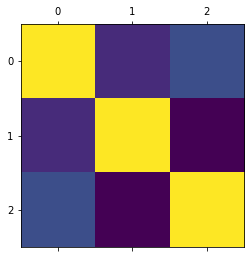

In [46]:
# Plot the correlation among themself for the previous 4 variables.
plt.matshow(corr_most.corr())
plt.show()
# corr = corr_most.corr()
# corr.style.background_gradient(cmap='coolwarm')


## Step 7:
### For the previoys 4 variables plot them AGAINST the class


In [3]:
# make 4 plot where you plot each of the variables with the class


## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [ ]:
# compute the probability

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [ ]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [ ]:
# Bayes time

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.